In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data_path = "data/mouse_drug_data.csv"
trial_data_path = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_data_path)
mouse_drug_df.head()

trial_data_df = pd.read_csv(trial_data_path)
trial_data_df.head()

# Combine the data into a single dataset
drug_results_df = pd.merge(mouse_drug_df, trial_data_df)

# Display the data table for preview
drug_results_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

#Remove Metastatic sites and mouse ID (not needed for this)
drug_results_tumor_df = pd.DataFrame({"Drug": drug_results_df["Drug"], "Timepoint": drug_results_df["Timepoint"],
                                     "Tumor Volume (mm3)": drug_results_df["Tumor Volume (mm3)"]})

#Average tumor volume for each drug and timepoint group and produce new dataframe
drug_results_grp = drug_results_tumor_df.groupby(["Drug", "Timepoint"])
drug_results_grp.mean()

drug_tumor_sum_df = pd.DataFrame(drug_results_grp.mean().reset_index())
drug_tumor_sum_df.head()
drug_tumor_sum_df.columns = ["Drug", "Timepoint", "Average Volume"]
drug_tumor_sum_df.head()

,Drug,Timepoint,Average Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_drug = drug_tumor_sum_df.groupby("Drug").sem()

drug_results_grp = drug_results_tumor_df.groupby(["Drug", "Timepoint"]).sem()
drug_results_grp

# Convert to DataFrame
drug_tumor_sem_df = pd.DataFrame(drug_results_grp.reset_index())
drug_tumor_sem_df.head()

# Preview DataFrame and RENAME Volume to SEM-standard error of mean
drug_tumor_sem_df.columns = ["Drug", "Timepoint", "SEM Tumor Volume"]
drug_tumor_sem_df.head()

,Drug,Timepoint,SEM Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

#Pivot average volum df for drugs to be columns and timeplot is index
drug_tumor_avg_df = drug_tumor_sum_df.pivot(index="Timepoint", columns= "Drug", values= "Average Volume")
drug_tumor_avg_df

#Pivot SEM df for drugs to be columns and timeplot is index
drug_tumor_sem_df = drug_tumor_sem_df.pivot(index="Timepoint", columns= "Drug", values= "SEM Tumor Volume")
drug_tumor_sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [5]:
#Build lists for mean and SEM Value for all drugs. Needed for graphing each grug seperately
#Capomulin
capo_means = drug_tumor_avg_df.loc[:, ['Capomulin']]
capo_means = capo_means['Capomulin']

capo_sem = drug_tumor_sem_df.loc[:, ['Capomulin']]
capo_sem = capo_sem['Capomulin']

#Infubinol
infub_means = drug_tumor_avg_df.loc[:, ['Infubinol']]
infub_means = infub_means['Infubinol']

infub_sem = drug_tumor_sem_df.loc[:, ['Infubinol']]
infub_sem = infub_sem['Infubinol']

#Ketapril
keta_means = drug_tumor_avg_df.loc[:, ['Ketapril']]
keta_means = keta_means['Ketapril']

keta_sem = drug_tumor_sem_df.loc[:, ['Ketapril']]
keta_sem = keta_sem['Ketapril']

#Placebo
placebo_means = drug_tumor_avg_df.loc[:, ['Placebo']]
placebo_means = placebo_means['Placebo']

placebo_sem = drug_tumor_sem_df.loc[:, ['Placebo']]
placebo_sem = placebo_sem['Placebo']

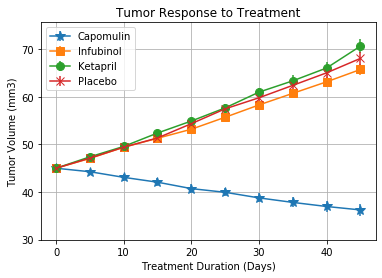

In [6]:
# Generate the Plot (with Error Bars)

#Min/Max values for average volume to determine limits on plot chart
min_volume = drug_tumor_sum_df.min()['Average Volume']
max_volume = drug_tumor_sum_df.max()['Average Volume']

#create additional white space on plot chart
min_volume = min_volume - 5
max_volume = max_volume + 5

#Limits, background grid, title, labels
plt.grid(True)
plt.ylim(min_volume, max_volume)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Tumor Response to Treatment")


#Plot the average tumor size over time for each drug (with error bars)

#The values for the x-axis will be the timepoints
time = list(drug_tumor_avg_df.index.values)

#Capomulin
plt.errorbar(time, capo_means, capo_sem, marker = "*", ms = 10, label = "Capomulin")

#Infubinol
plt.errorbar(time, infub_means, infub_sem, marker = "s", ms = 8, label = "Infubinol")

#Ketapril
plt.errorbar(time, keta_means, keta_sem, marker = "o", ms= 8, label = "Ketapril")

#Placebo
plt.errorbar(time, placebo_means, placebo_sem, marker = "x", ms= 8, label = "Placebo")

#Add legend
plt.legend(frameon=True)

# Save the Figure
plt.savefig("Tumor Response.png")

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
#Calculate mean of metastatic sites by Drug and Timeplot goruping
#Remove Vooume and Mice, not needed
drug_results_met_df = pd.DataFrame({'Drug' : drug_results_df['Drug'], 'Timepoint' : drug_results_df['Timepoint'], 
                                     'Metastatic Sites' : drug_results_df['Metastatic Sites']})

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_mets_grp = drug_results_met_df.groupby(['Drug', 'Timepoint'])
drug_mets_grp.mean()

#Convert grouped results into a new dataframe and reset the index
drug_met_avg_df = pd.DataFrame(drug_mets_grp.mean().reset_index())
#drug_met_avg_df.head(20)

#rename the mets column Average Met Sites and preview the dataframe
drug_met_avg_df.columns = ['Drug', 'Timepoint', 'Average Met Sites']
drug_met_avg_df.head(10)

#Get the min and max of the average met sites to use as limits in our plot
min_mets = drug_met_avg_df.min()['Average Met Sites']
max_mets = drug_met_avg_df.max()['Average Met Sites']

# Preview DataFrame
drug_met_avg_df.head(20)

,Drug,Timepoint,Average Met Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem_grp = drug_results_met_df.groupby(['Drug', 'Timepoint']).sem()

#Convert to df
drug_mets_sem_df = pd.DataFrame(met_sem_grp.reset_index())
drug_mets_sem_df.head()

#rename the Metastatic Sites column to SEM and preview
drug_mets_sem_df.columns = ['Drug', 'Timepoint', 'SEM Met Sites']
drug_mets_sem_df.head(20)

,Drug,Timepoint,SEM Met Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [9]:
# Minor Data Munging to Re-Format the Data Frames
#Pivot average metastatic df for drugs to be columns and timepoint is index
drug_met_avg_df = drug_met_avg_df.pivot(index='Timepoint', columns = 'Drug', values = 'Average Met Sites')
drug_met_avg_df.head(5)

#Pivot SEM volume df for drugs to be columns and timepoint is index
drug_mets_sem_df = drug_mets_sem_df.pivot(index='Timepoint', columns = 'Drug', values = 'SEM Met Sites')
drug_mets_sem_df.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [10]:
#Build lists for mean and SEM Value for all drugs. Needed for graphing each grug seperately
#Capomulin
capo_met_means = drug_met_avg_df.loc[:, ['Capomulin']]
capo_met_means = capo_met_means['Capomulin']

capo_met_sem = drug_mets_sem_df.loc[:, ['Capomulin']]
capo_met_sem = capo_met_sem['Capomulin']

#Infubinol
infub_met_means = drug_met_avg_df.loc[:, ['Infubinol']]
infub_met_means = infub_met_means['Infubinol']

infub_met_sem = drug_mets_sem_df.loc[:, ['Infubinol']]
infub_met_sem = infub_met_sem['Infubinol']

#Ketapril
keta_met_means = drug_met_avg_df.loc[:, ['Ketapril']]
keta_met_means = keta_met_means['Ketapril']

keta_met_sem = drug_mets_sem_df.loc[:, ['Ketapril']]
keta_met_sem = keta_met_sem['Ketapril']

#Placebo
placebo_met_means = drug_met_avg_df.loc[:, ['Placebo']]
placebo_met_means = placebo_met_means['Placebo']

placebo_met_sem = drug_mets_sem_df.loc[:, ['Placebo']]
placebo_met_sem = placebo_met_sem['Placebo']
placebo_met_sem

Timepoint
0     0.000000
5     0.100947
10    0.115261
15    0.190221
20    0.234064
25    0.263888
30    0.300264
35    0.341412
40    0.297294
45    0.304240
Name: Placebo, dtype: float64

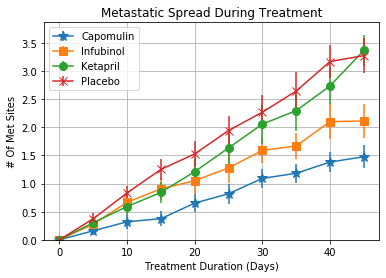

In [11]:
# Generate the Plot (with Error Bars)

#Additional space on plot edges
max_mets = max_mets + 0.5

#Set limits, background gridlines,  labels
plt.grid(True)
plt.ylim(min_mets, max_mets)
plt.ylabel("# Of Met Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastatic Spread During Treatment")

#Assign timepoints to x-axis, Treatment Duration
time = list(drug_met_avg_df.index.values)

#Capomulin
plt.errorbar(time, capo_met_means, capo_met_sem, marker = "*", ms = 10, label = "Capomulin")

#Infubinol
plt.errorbar(time, infub_met_means, infub_met_sem, marker = "s", ms = 8, label = "Infubinol")

#Ketapril
plt.errorbar(time, keta_met_means, keta_met_sem, marker = "o", ms = 8, label = "Ketapril")

#Placebo
plt.errorbar(time, placebo_met_means, placebo_met_sem, marker = "x", ms = 8, label = "Placebo")

#Add legend, save plot as a png, show the plot
plt.legend(frameon=True)

#Save the figure
plt.savefig('Metastatic Spread.png') 

#Show the figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#New df only mice, drug and timepoint columns
drug_results_survival_df = pd.DataFrame({'Mice' : drug_results_df['Mouse ID'],
                                         'Drug' : drug_results_df['Drug'], 'Timepoint' : drug_results_df['Timepoint']})
drug_results_survival_df.head()

#group df by drug and timepoint
data_mice_count = drug_results_survival_df.groupby(['Drug', 'Timepoint'])

#convert grouped object into df and reset index
survival_count_df = pd.DataFrame(data_mice_count.count().reset_index())

#rename the mice to number of surviving mice
survival_count_df = survival_count_df.rename(columns={'Mice' : '# of Surviving Mice'})
survival_count_df.head()

,Drug,Timepoint,# of Surviving Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames

#New df to show survival rate as percentage
survival_percent_df = pd.DataFrame({"Drug" : survival_count_df['Drug'], "Timepoint": survival_count_df['Timepoint'],
                                    "Survival %" : (survival_count_df['# of Surviving Mice'] / 25) * 100})
survival_percent_df.head(20)

,Drug,Timepoint,Survival %
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0
5,Capomulin,25,88.0
6,Capomulin,30,88.0
7,Capomulin,35,88.0
8,Capomulin,40,84.0
9,Capomulin,45,84.0


In [14]:
#Pivot count of mice survival df so drugs are the columns and timepoint is index
survival_percent_df = survival_percent_df.pivot(index='Timepoint', columns = 'Drug', values = 'Survival %')

#Preview
survival_percent_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


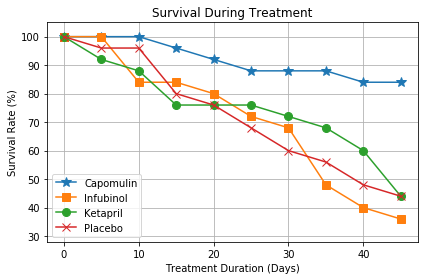

In [15]:
# Generate the Plot (Accounting for percentages)

#get  minimum survival rate for y-axis limit
min_survival_percent = survival_percent_df.min()
min_survival_percent = min_survival_percent.min()

#lower minimum so lines fit on chart
min_rate = min_survival_percent - 12

#Assign x-axis
x_axis = list(survival_percent_df.index.values)

#Assign survival rates for each drug to variable
capo_survival_percent = survival_percent_df.loc[:, ['Capomulin']]
infub_survival_percent = survival_percent_df.loc[:, ['Infubinol']]
keta_survival_percent = survival_percent_df.loc[:, ['Ketapril']]
placebo_survival_percent = survival_percent_df.loc[:, ['Placebo']]

#Create plot
plt.grid(True)
plt.ylim(min_survival_percent, 105)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Survival During Treatment")
plt.plot(x_axis, capo_survival_percent, marker = "*", ms = 10, label = "Capomulin")
plt.plot(x_axis, infub_survival_percent, marker = "s", ms = 8, label = "Infubinol")
plt.plot(x_axis, keta_survival_percent, marker = "o", ms = 8, label = "Ketapril")
plt.plot(x_axis, placebo_survival_percent, marker = "x", ms = 8, label = "Placebo")

#Add legend, specify tight layout
plt.legend(frameon=True)
plt.tight_layout()

#Save the Figure
plt.savefig('Survival Rates.png') 

#Display the figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
#initial volume of  tumors by drug by summing all values at timepoint 0
initial_volumes = drug_results_df.loc[(drug_results_df["Timepoint"] == 0), ["Drug", "Tumor Volume (mm3)"]]
init_vol = initial_volumes.groupby("Drug")["Tumor Volume (mm3)"].sum()

#Initialize tracking data frame, loop through each mouse to find final tumor volume and record it
end_vol = pd.DataFrame(columns = ['Drug', 'Tumor Volume (mm3)'])

for mouse in mouse_drug_df["Mouse ID"]:
    max_time = drug_results_df.loc[drug_results_df["Mouse ID"] == mouse, "Timepoint"].max()
    vol_final = drug_results_df.loc[(drug_results_df["Timepoint"] == max_time) & (drug_results_df["Mouse ID"] == mouse),
                                ["Drug", "Tumor Volume (mm3)"]]    
    end_vol = pd.concat([end_vol, vol_final])

#Group final volumes by drug to compare to initial volume
end_grouped = end_vol.groupby("Drug")["Tumor Volume (mm3)"].sum()

#Subtract initial volume from final volume and divide initial volume to get the % difference
vol_change = 100*(end_grouped - init_vol)/init_vol

print(vol_change)

Drug
Capomulin   -18.516516
Ceftamin     28.342171
Infubinol    30.442222
Ketapril     39.569314
Naftisol     36.012793
Placebo      34.463143
Propriva     26.580767
Ramicane    -19.574688
Stelasyn     35.827583
Zoniferol    31.513906
Name: Tumor Volume (mm3), dtype: float64


In [17]:
#label each bar with height value
def autolabel(rects, ax):
    #y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        
        #print the percentage in the center of the bar
        label_position = height/2

        ax.text(rect.get_x() + rect.get_width()/2., label_position,str('%d' % int(height)) + '%',
                ha='center', va='bottom', color = 'w', size = 14)

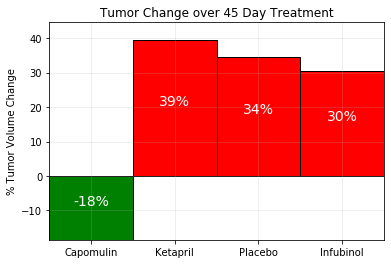

In [18]:
fig, ax = plt.subplots()

x_axis = np.arange(0,4,1)
heights = [vol_change["Capomulin"], vol_change["Ketapril"], vol_change["Placebo"], vol_change["Infubinol"]]
labels = ["Capomulin", "Ketapril", "Placebo", "Infubinol"]
colors = []

#If the change in volume is positive, assign the color red, else green
for vols in heights:
    if vols >= 0:
        colors.append('r')
    else:
        colors.append('g')

barplot = ax.bar(x_axis, heights, width = 1, align='center', color = colors,
                 edgecolor = 'black', linewidth = 1, tick_label = labels)

#Add labeling
ax.set_title("Tumor Change over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")

# Add Gridlines
ax.grid(alpha = 0.25)

#Adjust axis
ax.set_xlim(-.5,3.5)
ax.set_ylim(min(heights), max(heights)+5)

#Add labels for percentages
autolabel(barplot, ax)

#Save the Figure
plt.savefig('Tumor Change After 45 Days.png') 

#Show the figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)